In [12]:
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle
from numpy.random import randint

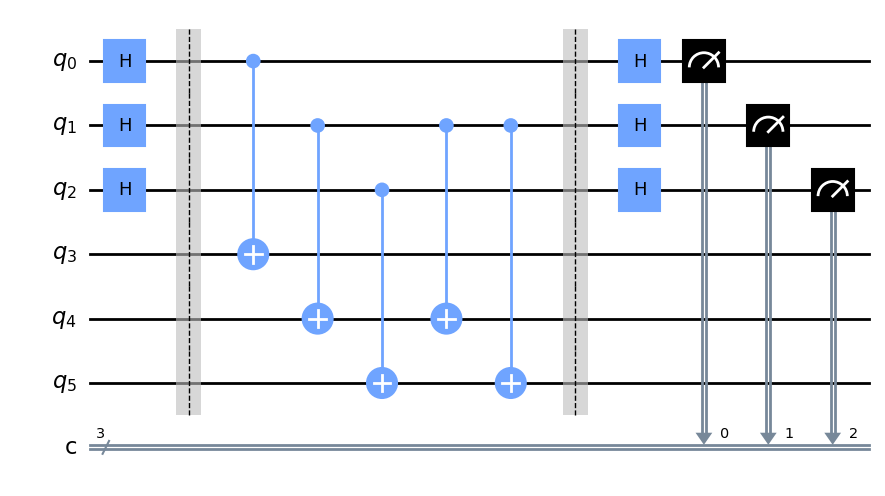

In [13]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit.compose(simon_oracle(b), inplace=True)

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw('mpl')

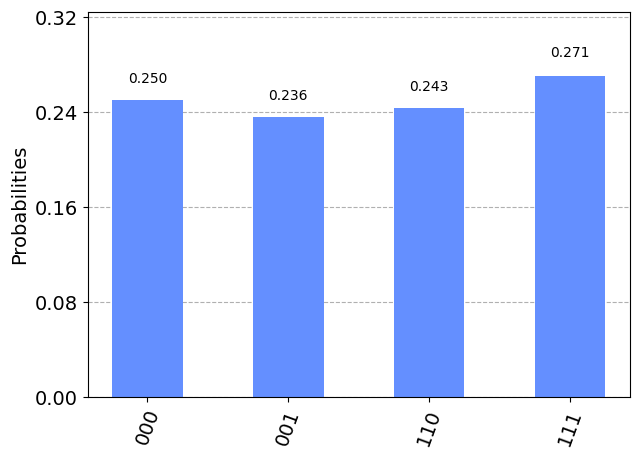

In [14]:
backend = Aer.get_backend('qasm_simulator')
results = execute(simon_circuit, backend, shots=1024).result()
plot_histogram(results.get_counts())

In [15]:
# Calculate the dot product of the results to verify
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

counts = results.get_counts()
for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

110.110 = 0 (mod 2)
110.000 = 0 (mod 2)
110.111 = 0 (mod 2)
110.001 = 0 (mod 2)
